In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv(r'C:\Users\USER\Desktop\ML\internsavy\Batsman_Data.csv')

In [4]:
dataset.shape

(11149, 13)

In [6]:
dataset.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [6]:
dataset.describe()

,Unnamed: 0,Player_ID
count,11149.00000,1.114900e+04
mean,5575.00000,2.259088e+05
std,3218.58341,1.942613e+05
min,1.00000,5.334000e+03
25%,2788.00000,4.749200e+04
50%,5575.00000,2.335140e+05
75%,8362.00000,3.217770e+05
max,11149.00000,1.158100e+06


In [7]:
dataset.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [10]:
dataset.nunique()

Unnamed: 0    11149
Bat1            323
Runs            180
BF              163
SR             2032
4s               26
6s               17
Opposition       22
Ground          134
Start Date     1625
Match_ID       1844
Batsman         149
Player_ID       150
dtype: int64

In [8]:
import matplotlib.pyplot as plt

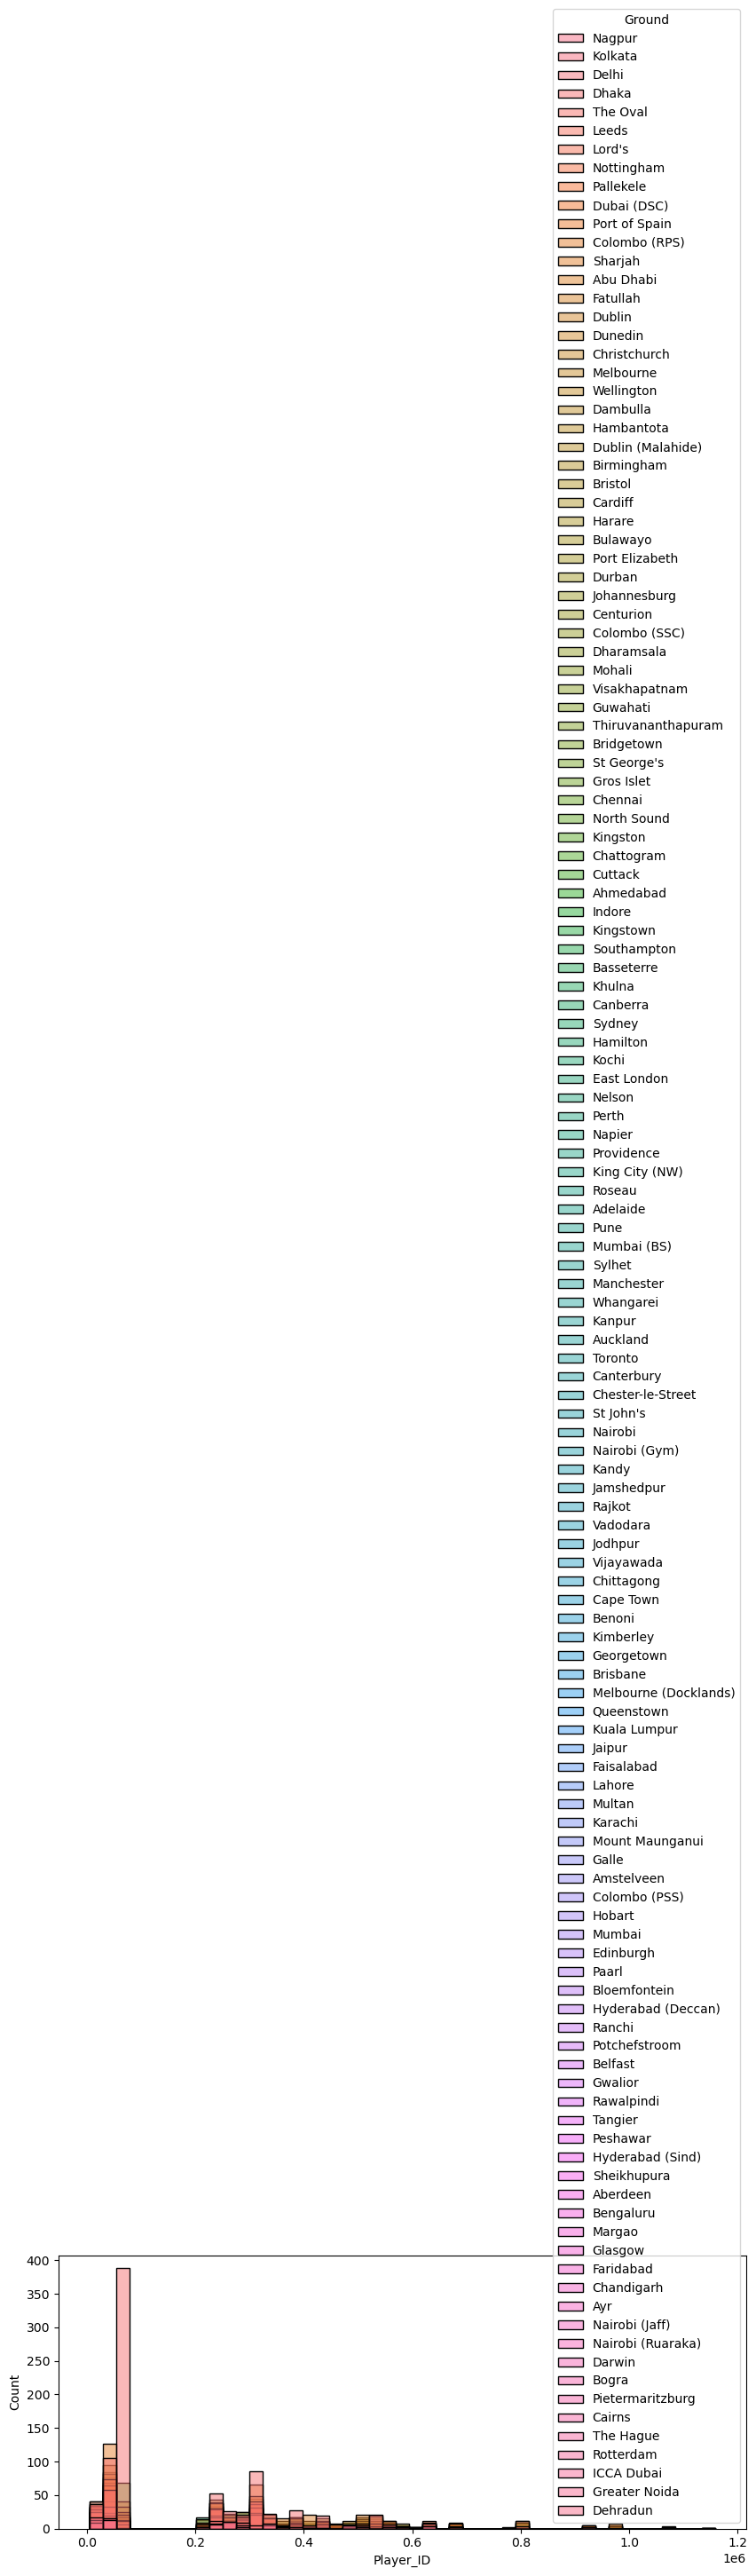

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(x='Player_ID',hue = 'Ground',data = dataset)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [10]:
dataset.columns

Index(['Unnamed: 0', 'Bat1', 'Runs', 'BF', 'SR', '4s', '6s', 'Opposition',
       'Ground', 'Start Date', 'Match_ID', 'Batsman', 'Player_ID'],
      dtype='object')

In [34]:
dataset['Unnamed: 0'] = encoder.fit_transform(dataset['Unnamed: 0'])
dataset['Bat1'] = encoder.fit_transform(dataset['Bat1'])
dataset['Runs'] = encoder.fit_transform(dataset['Runs'])
dataset['BF'] = encoder.fit_transform(dataset['BF'])
dataset['SR'] = encoder.fit_transform(dataset['SR'])
dataset['4s'] = encoder.fit_transform(dataset['4s'])
dataset['6s'] = encoder.fit_transform(dataset['6s'])
dataset['Player_ID'] = encoder.fit_transform(dataset['Player_ID'])
dataset['Opposition'] = encoder.fit_transform(dataset['Opposition'])
dataset['Ground'] = encoder.fit_transform(dataset['Ground'])
dataset['Start Date'] = encoder.fit_transform(dataset['Start Date'])
dataset['Match_ID'] = encoder.fit_transform(dataset['Match_ID'])
dataset['Batsman'] = encoder.fit_transform(dataset['Batsman'])
dataset.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,0,319,0,0,0,0,0,9,92,492,759,113,20
1,1,319,0,0,0,0,0,9,78,864,761,113,20
2,2,319,0,0,0,0,0,9,37,1030,762,113,20
3,3,319,0,0,0,0,0,4,38,1327,763,113,20
4,4,319,0,0,0,0,0,9,38,1374,764,113,20


In [35]:
x = dataset.drop('Runs',axis = 1)
y = dataset['Runs']

In [36]:
x.head()

,Unnamed: 0,Bat1,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,0,319,0,0,0,0,9,92,492,759,113,20
1,1,319,0,0,0,0,9,78,864,761,113,20
2,2,319,0,0,0,0,9,37,1030,762,113,20
3,3,319,0,0,0,0,4,38,1327,763,113,20
4,4,319,0,0,0,0,9,38,1374,764,113,20


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 3)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
p = model.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(p,y_test)

0.8174887892376682

In [43]:
p

array([  1, 133,   0, ..., 158,  85,  47])

In [47]:
import numpy as np
features = pd.Series(model.feature_importances_,index = x_train.columns).sort_values(ascending = True)

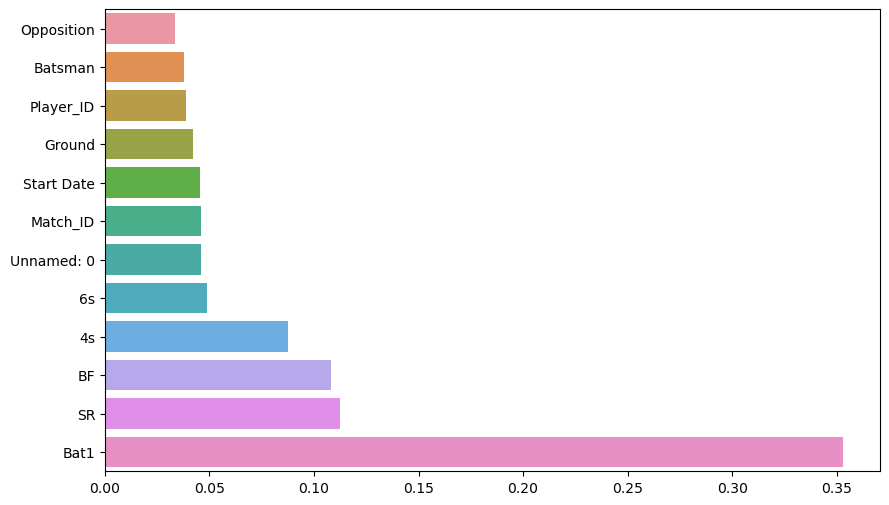

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x = features, y = features.index)
plt.show()